# Fourier Transform

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d
from matplotlib.cm import get_cmap
from matplotlib.image import imread
import os

In [2]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams.update({'font.size': 10})

## Inner Product

In [3]:
f = np.array([0, 0, .1, .2, .25, .2, .25, .3, .35, .43, .45, .5, .55, .5, .4, .425, .45, .425, .4, .35, .3, .25, .225, .2, .1, 0, 0])
g = np.array([0, 0, .025, .1, .2, .175, .2, .25, .25, .3, .32, .35, .375, .325, .3, .275, .275, .25, .225, .225, .2, .175, .15, .15, .05, 0, 0])
g = g - 0.025 * np.ones_like(g)
x = 0.1 * np.arange(1,len(f)+1)
xf = np.arange(0.1,x[-1],0.01)

In [4]:
f_interp = interpolate.interp1d(x, f, kind='cubic')
g_interp = interpolate.interp1d(x, g, kind='cubic')

ff = f_interp(xf)  
gf = g_interp(xf)

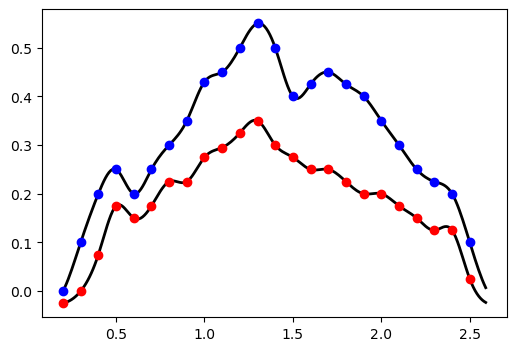

In [5]:
plt.plot(xf[10:-10],ff[10:-10],color='k',linewidth=2)
plt.plot(x[1:-2],f[1:-2],'o',color='b')

plt.plot(xf[10:-10],gf[10:-10],color='k',linewidth=2)
plt.plot(x[1:-2],g[1:-2],'o',color='r')

plt.show()

## Fourier Series

In [6]:
# Define domain
dx = 0.001
L = np.pi
x = L * np.arange(-1+dx,1+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

In [7]:
# Define hat function
f = np.zeros_like(x)
f[nquart:2*nquart] = (4/n)*np.arange(1,nquart+1)
f[2*nquart:3*nquart] = np.ones(nquart) - (4/n)*np.arange(0,nquart)

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_14528\348744310.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab10')


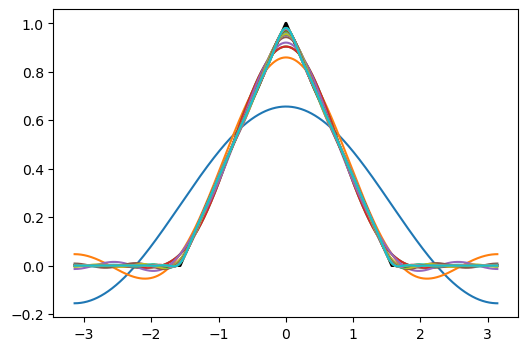

In [8]:
fig, ax = plt.subplots()
ax.plot(x,f,'-',color='k',linewidth=2)

# Compute Fourier series
name = "Accent"
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color=colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0/2

A = np.zeros(20)
B = np.zeros(20)
for k in range(20):
    A[k] = np.sum(f * np.cos(np.pi*(k+1)*x/L)) * dx # Inner product
    B[k] = np.sum(f * np.sin(np.pi*(k+1)*x/L)) * dx
    fFS = fFS + A[k]*np.cos((k+1)*np.pi*x/L) + B[k]*np.sin((k+1)*np.pi*x/L)
    ax.plot(x,fFS,'-')

In [9]:
## Plot amplitudes

fFS = (A0/2) * np.ones_like(f)
kmax = 100
A = np.zeros(kmax)
B = np.zeros(kmax)
ERR = np.zeros(kmax)

A[0] = A0/2
ERR[0] = np.linalg.norm(f-fFS)/np.linalg.norm(f)

for k in range(1,kmax):
    A[k] = np.sum(f * np.cos(np.pi*k*x/L)) * dx
    B[k] = np.sum(f * np.sin(np.pi*k*x/L)) * dx
    fFS = fFS + A[k] * np.cos(k*np.pi*x/L) + B[k] * np.sin(k*np.pi*x/L)
    ERR[k] = np.linalg.norm(f-fFS)/np.linalg.norm(f)
    
thresh = np.median(ERR) * np.sqrt(kmax) * (4/np.sqrt(3))
r = np.max(np.where(ERR > thresh))

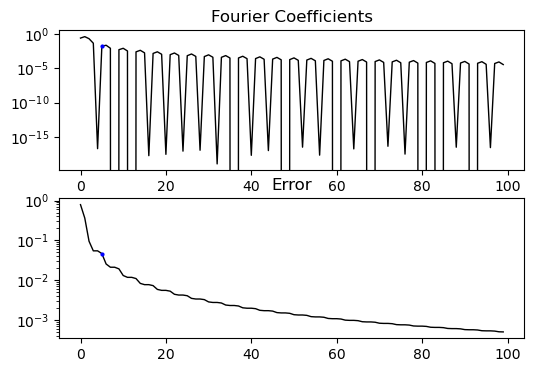

In [10]:
fig, axs = plt.subplots(2,1)
axs[0].semilogy(np.arange(kmax),A,color='k',linewidth=1)
axs[0].semilogy(r,A[r],'o',color='b',markersize=2)
plt.sca(axs[0])
plt.title('Fourier Coefficients')

axs[1].semilogy(np.arange(kmax),ERR,color='k',linewidth=1)
axs[1].semilogy(r,ERR[r],'o',color='b',markersize=2)
plt.sca(axs[1])
plt.title('Error')

plt.show()

## Gibbs Phenomena

In [11]:
dx = 0.01
L = 2*np.pi
x = np.arange(0,L+dx,dx)
n = len(x)
nquart = int(np.floor(n/4))

In [12]:
f = np.zeros_like(x)
f[nquart:3*nquart] = 1

In [13]:
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0/2 * np.ones_like(f)

In [14]:
for k in range(1,101):
    Ak = np.sum(f * np.cos(2*np.pi*k*x/L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2*np.pi*k*x/L)) * dx * 2 / L
    fFS = fFS + Ak*np.cos(2*k*np.pi*x/L) + Bk*np.sin(2*k*np.pi*x/L)

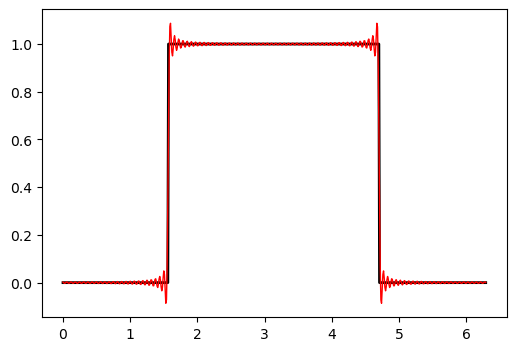

In [15]:
plt.plot(x,f,color='k',linewidth=2)
plt.plot(x,fFS,'-',color='r',linewidth=1)
plt.show()

## Discrete Fourier Transform

In [16]:
n = 256
w = np.exp(-1j * 2 * np.pi / n)
DFT = np.zeros((n,n))

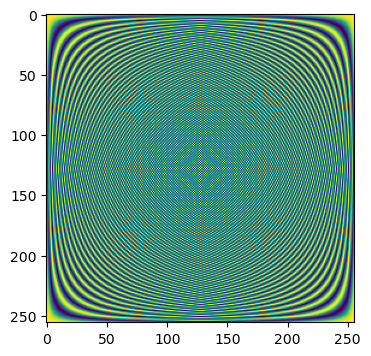

In [17]:
# Fast
J,K = np.meshgrid(np.arange(n),np.arange(n))
DFT = np.power(w,J*K)
DFT = np.real(DFT)
       
plt.imshow(DFT)
plt.show()

## Denoise with Fast Fourier Transform

In [18]:
# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))              # Add some noise

In [19]:
## Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq)
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs

In [20]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat) # Inverse FFT for filtered time signal

c:\Users\Guilherme\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


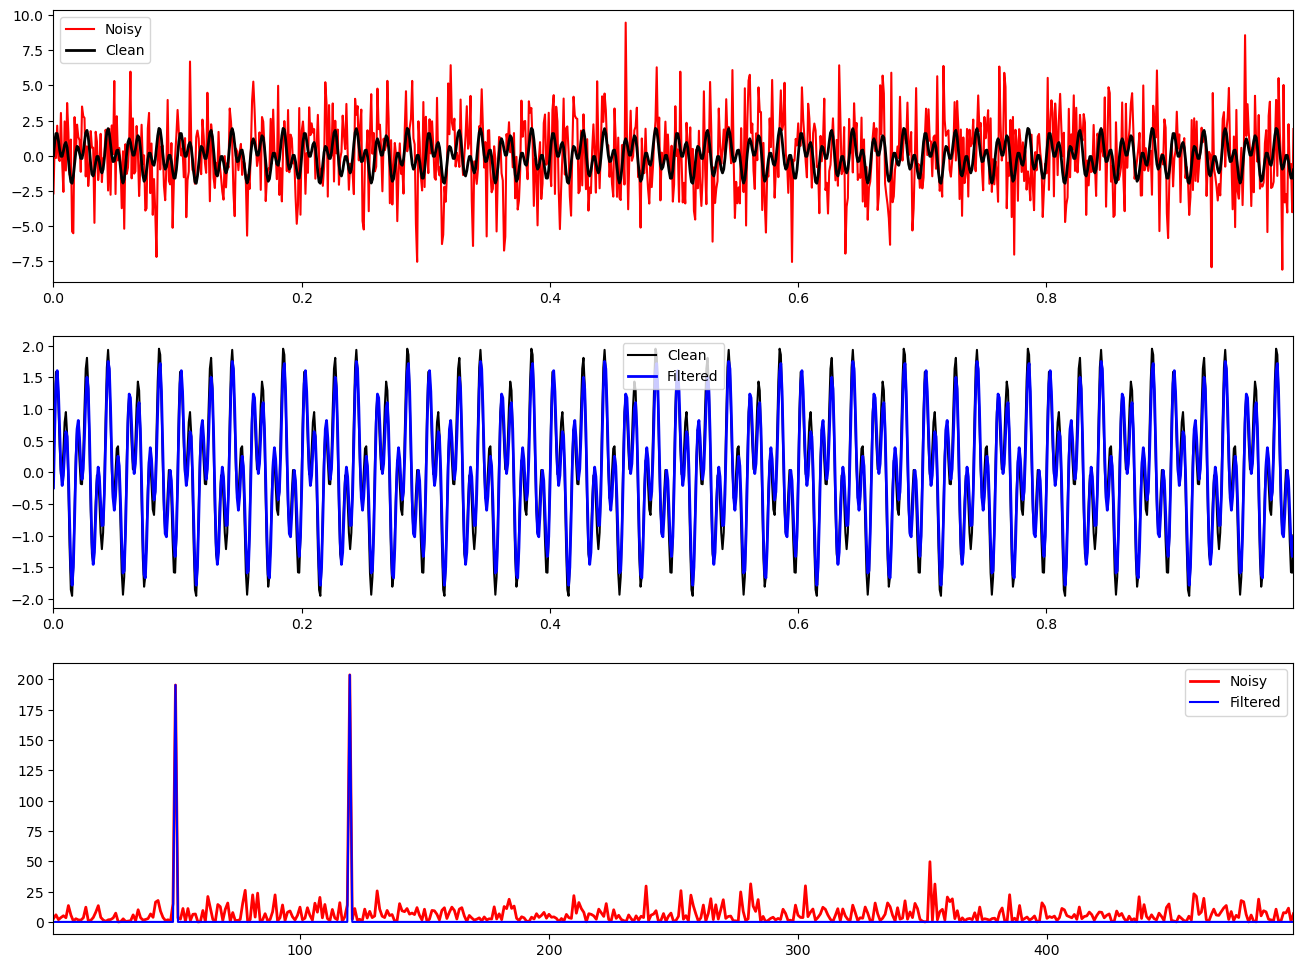

In [21]:
plt.rcParams['figure.figsize'] = [16, 12]

## Plots
fig,axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

## Spectral Derivative wit Fast Fourier Transform

In [22]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 14})

In [23]:
n = 128
L = 30
dx = L/n
x = np.arange(-L/2,L/2,dx,dtype='complex_')
f = np.cos(x) * np.exp(-np.power(x,2)/25) # Function
df = -(np.sin(x) * np.exp(-np.power(x,2)/25) + (2/25)*x*f) # Derivative

In [24]:
## Approximate derivative using finite difference
dfFD = np.zeros(len(df),dtype='complex_')
for kappa in range(len(df)-1):
    dfFD[kappa] = (f[kappa+1]-f[kappa])/dx
    
dfFD[-1] = dfFD[-2]

In [25]:
## Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2,n/2)
kappa = np.fft.fftshift(kappa) # Re-order fft frequencies
dfhat = kappa * fhat * (1j)
dfFFT = np.real(np.fft.ifft(dfhat))

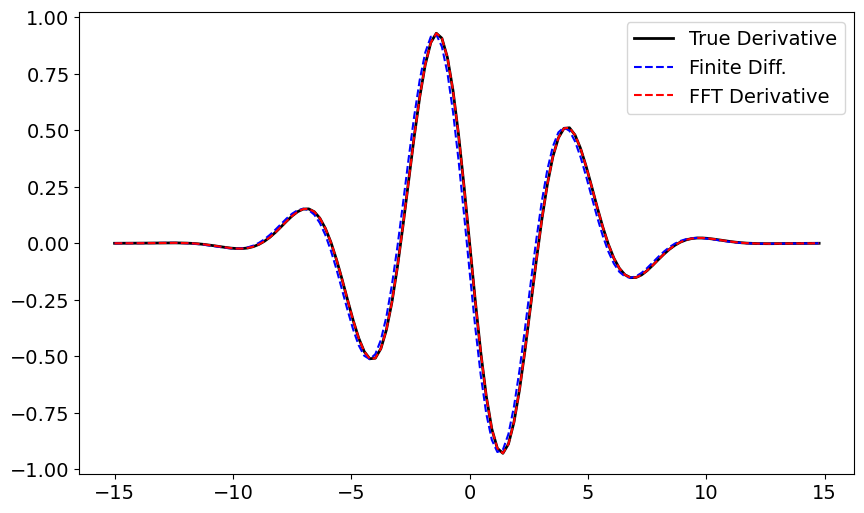

In [26]:
## Plots
plt.plot(x,df.real,color='k',linewidth=2,label='True Derivative')
plt.plot(x,dfFD.real,'--',color='b',linewidth=1.5,label='Finite Diff.')
plt.plot(x,dfFFT.real,'--',color='r',linewidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()

## Solving Partial Differential Equations using FFT

#### Heat Equation

In [27]:
a = 1    # Thermal diffusivity constant
L = 100  # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

In [28]:
# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

In [29]:
# Initial condition
u0 = np.zeros_like(x)
u0[int((L/2 - L/10)/dx):int((L/2 + L/10)/dx)] = 1
u0hat = np.fft.fft(u0)
u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

In [30]:
# Simulate in Fourier frequency domain
dt = 0.1
t = np.arange(0,10,dt)

In [31]:
def rhsHeat(uhat_ri,t,kappa,a):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -a**2 * (np.power(kappa,2)) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

In [32]:
uhat_ri = odeint(rhsHeat, u0hat_ri, t, args=(kappa,a))

uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real  

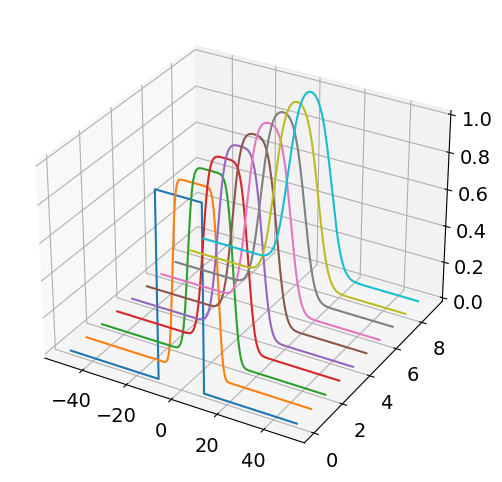

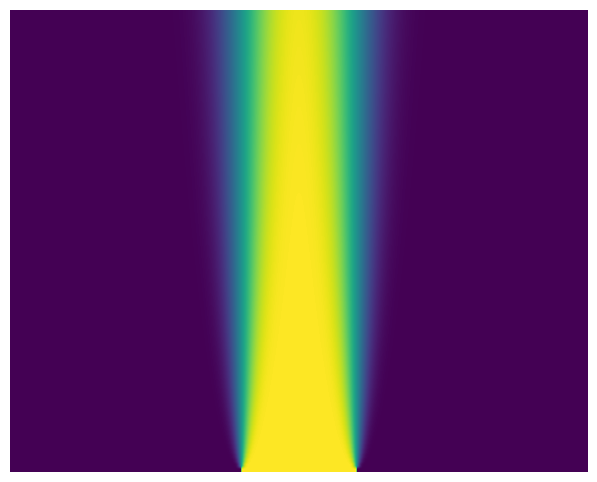

In [33]:
# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

#### Wave Equation

In [34]:
c = 2    # Wave speed
L = 20   # Length of domain
N = 1000 # Number of discretization points
dx = L/N
x = np.arange(-L/2,L/2,dx) # Define x domain

In [35]:
# Define discrete wavenumbers
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)

In [36]:
# Initial condition
u0 = 1/np.cosh(x)
u0hat = np.fft.fft(u0)

u0hat_ri = np.concatenate((u0hat.real,u0hat.imag))

In [37]:
# Simulate in Fourier frequency domain
dt = 0.025
t = np.arange(0,100*dt,dt)

In [38]:
def rhsWave(uhat_ri,t,kappa,c):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -c*(1j)*kappa*uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

In [39]:
uhat_ri = odeint(rhsWave, u0hat_ri, t, args=(kappa,c))
uhat = uhat_ri[:,:N] + (1j) * uhat_ri[:,N:]

In [40]:
# Alternatively, simulate in spatial domain
def rhsWaveSpatial(u,t,kappa,c):
    uhat = np.fft.fft(u)
    d_uhat = (1j)*kappa*uhat
    d_u = np.fft.ifft(d_uhat).real
    du_dt = -c*d_u
    return du_dt

In [41]:
u = odeint(rhsWaveSpatial,u0,t,args=(kappa,c))

# Inverse FFT to bring back to spatial domain
u = np.zeros_like(uhat)

for k in range(len(t)):
    u[k,:] = np.fft.ifft(uhat[k,:])

u = u.real  

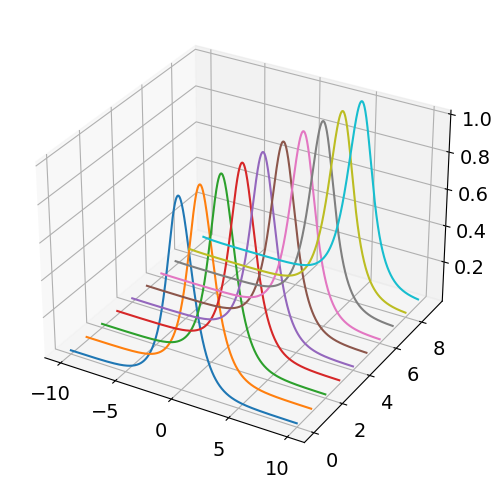

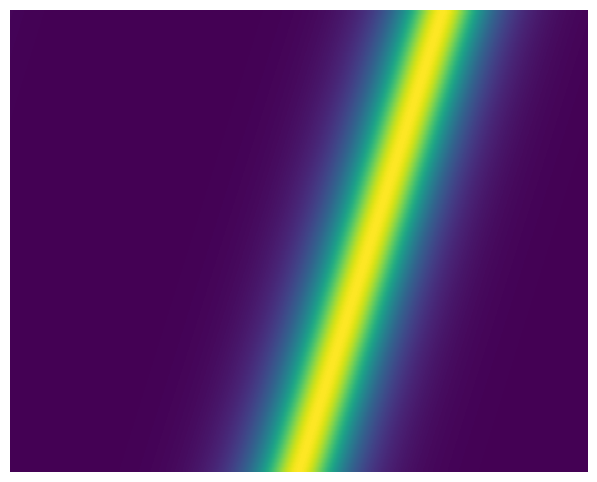

In [42]:
# Waterfall plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x,ys,u_plot[j,:])
    
# Image plot
plt.figure()
plt.imshow(np.flipud(u), aspect=8)
plt.axis('off')
plt.show()

## Image Compression with FFT

In [43]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams.update({'font.size': 18})

A = imread(os.path.join('Data','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

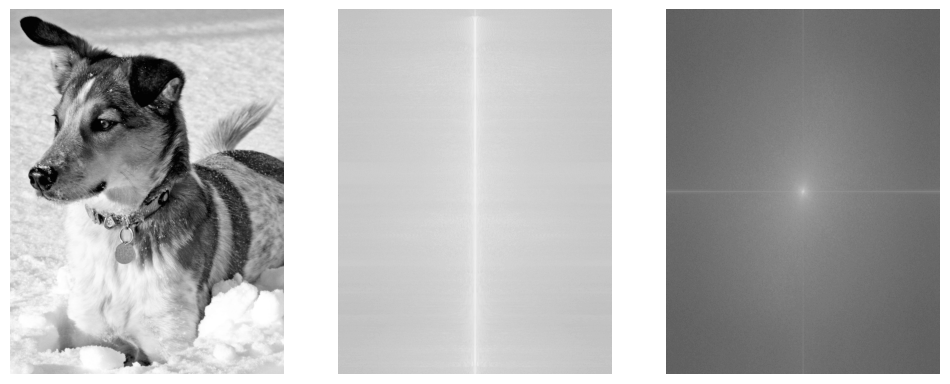

In [44]:
fig,axs = plt.subplots(1,3)

# Plot image
img = axs[0].imshow(B)
img.set_cmap('gray')
axs[0].axis('off')

# Compute row-wise FFT

Cshift = np.zeros_like(B,dtype='complex_')
C = np.zeros_like(B,dtype='complex_')

for j in range(B.shape[0]):
    Cshift[j,:] = np.fft.fftshift(np.fft.fft(B[j,:]))
    C[j,:] = np.fft.fft(B[j,:])
    
img = axs[1].imshow(np.log(np.abs(Cshift)))
img.set_cmap('gray')
axs[1].axis('off')

# Compute column-wise FFT

D = np.zeros_like(C)
for j in range(C.shape[1]):
    D[:,j] = np.fft.fft(C[:,j])

img = axs[2].imshow(np.fft.fftshift(np.log(np.abs(D))))
img.set_cmap('gray')
axs[2].axis('off')

plt.show()

# Much more efficient to use fft2
D = np.fft.fft2(B)

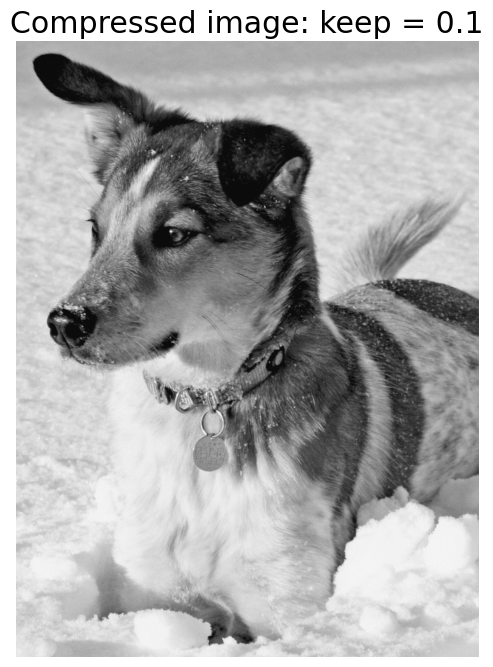

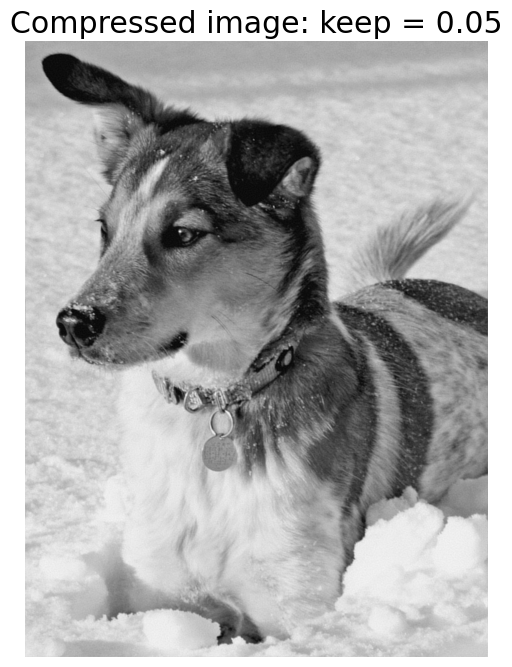

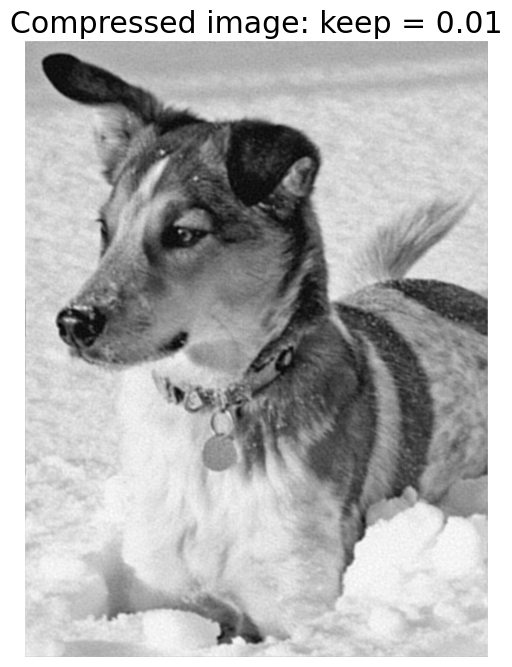

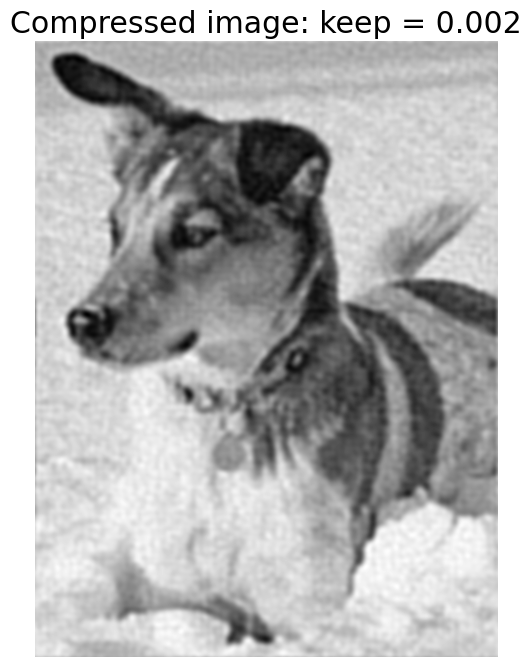

In [45]:
A = imread(os.path.join('Data','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

Bt = np.fft.fft2(B)
Btsort = np.sort(np.abs(Bt.reshape(-1))) # sort by magnitude

# Zero out all small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]
    ind = np.abs(Bt)>thresh          # Find small indices
    Atlow = Bt * ind                 # Threshold small indices
    Alow = np.fft.ifft2(Atlow).real  # Compressed image
    plt.figure()
    plt.imshow(Alow,cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep))

#### Denoise an Image with FFT

In [46]:
A = imread(os.path.join('Data','dog.jpg'))
B = np.mean(A, -1); # Convert RGB to grayscale

In [47]:
plt.rcParams['figure.figsize'] = [16, 16]

In [48]:
## Denoise
Bnoise = B + 200*np.random.randn(*B.shape).astype('uint8') # Add some noise
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # Put FFT on log scale

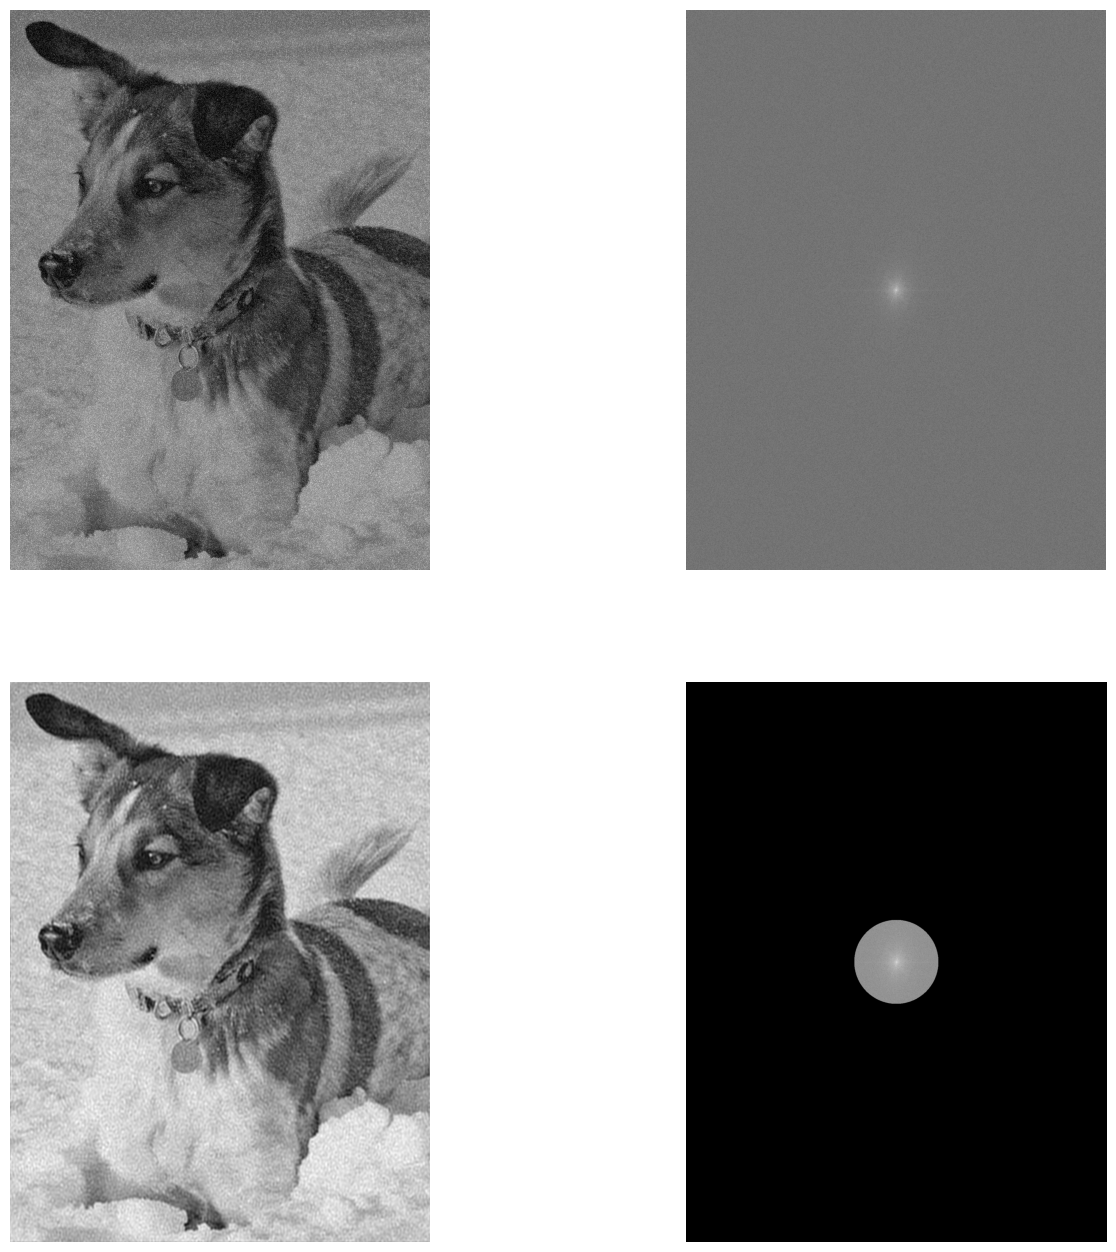

In [49]:
fig,axs = plt.subplots(2,2)

axs[0,0].imshow(Bnoise,cmap='gray')
axs[0,0].axis('off')

axs[0,1].imshow(F,cmap='gray')
axs[0,1].axis('off')

nx,ny = B.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
# xgrid = np.fft.ifftshift(np.arange(-nx/2+1,nx/2+1))
# ygrid = np.fft.ifftshift(np.arange(-ny/2+1,ny/2+1))
# X,Y = np.meshgrid(ygrid,xgrid)
R2 = np.power(X,2) + np.power(Y,2)
ind = R2 < 150**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale

axs[1,1].imshow(Ffilt,cmap='gray')
axs[1,1].axis('off')

Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt).real
axs[1,0].imshow(Bfilt,cmap='gray')
axs[1,0].axis('off')

plt.show()